<a href="https://colab.research.google.com/github/Epsita-R/NLP/blob/main/%E2%80%9CEpsita_2348517_CIA_II%E2%80%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data=pd.read_csv('/content/Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


Preprocessing

In [7]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
# Handling null values
data['negativereason'].fillna('Not Specified', inplace=True)
data['negativereason_confidence'].fillna(data['negativereason_confidence'].mean(), inplace=True)
data['airline_sentiment_gold'].fillna('Not Specified', inplace=True)
data['negativereason_gold'].fillna('Not Specified', inplace=True)
data['tweet_coord'].fillna('Not Specified', inplace=True)
data['tweet_location'].fillna('Not Specified', inplace=True)
data['user_timezone'].fillna('Not Specified', inplace=True)

# Verifying the changes
print(data.isnull().sum())

tweet_id                        0
airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
airline_sentiment_gold          0
name                            0
negativereason_gold             0
retweet_count                   0
text                            0
tweet_coord                     0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64


In [14]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

# Tokenization
data['tokenized_text'] = data['text'].apply(lambda x: word_tokenize(x))

# Removing Special Characters and Numbers
data['clean_text'] = data['text'].str.replace('[^a-zA-Z\s]', '')

# Removing URLs
data['clean_text'] = data['clean_text'].str.replace(r'http\S+', '')

# Lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
data['lemmatized_text'] = data['clean_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Removing Punctuation
data['clean_text'] = data['text'].str.replace('[%s]' % re.escape(string.punctuation), '')

# Removing Mentions and Hashtags
data['clean_text'] = data['clean_text'].str.replace(r'@[A-Za-z0-9]+', '')
data['clean_text'] = data['clean_text'].str.replace(r'#', '')

# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['clean_text'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
# Preparing data for RNN and LSTM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Embedding, Dense, SpatialDropout1D
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# Extract text data and target labels
X = data['clean_text'].values
y = data['airline_sentiment'].values

# Encode the target variable
label_encoder = LabelEncoder()
encoded_sentiment = label_encoder.fit_transform(y)

# Tokenize and pad the sequences
max_features = 10000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, encoded_sentiment, test_size=0.2, random_state=42)


**RNN**

Recurrent Neural Network is a type of artificial neural network used for sequential data processing, where the input data is in a sequential or time-series format.

Each neuron is connected to itself, creating a loop. This loop gives the network memory to process sequential data. The basic RNN unit has an input layer, a hidden layer with a recurrent connection, and an output layer.
The recurrent connection allows information to be passed from one time step to the next. This enables the network to remember past information while processing current inputs.

Major drawback with traditional RNN is the vanishing gradient problem, where gradients become extremely small, creating long-term dependencies in the data.
This can be eliminated by using Long Short-Term Memory (LSTM), as it can control the flow of information through the network.

RNN is used in text generation, machine translation, sentiment analysis, speech recognition, etc. In natural language processing, an RNN can be used to predict the next word in a sentence based on the words that have come before it. The network takes each word as input at different time steps, remembers the context from previous words, and predicts the next word in the sequence.

In [27]:
# Initialize and train the RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=max_features, output_dim=128, input_length=X_pad.shape[1]))
rnn_model.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))
rnn_model.add(Dense(3, activation='softmax'))
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
366/366 - 23s - loss: 0.8473 - accuracy: 0.6425 - val_loss: 0.6185 - val_accuracy: 0.7483 - 23s/epoch - 64ms/step
Epoch 2/5
366/366 - 23s - loss: 0.5594 - accuracy: 0.7717 - val_loss: 0.6256 - val_accuracy: 0.7466 - 23s/epoch - 64ms/step
Epoch 3/5
366/366 - 13s - loss: 0.4001 - accuracy: 0.8462 - val_loss: 0.6548 - val_accuracy: 0.7596 - 13s/epoch - 36ms/step
Epoch 4/5
366/366 - 13s - loss: 0.3047 - accuracy: 0.8870 - val_loss: 0.6760 - val_accuracy: 0.7879 - 13s/epoch - 37ms/step
Epoch 5/5
366/366 - 13s - loss: 0.2342 - accuracy: 0.9131 - val_loss: 0.7532 - val_accuracy: 0.7678 - 13s/epoch - 35ms/step


**LSTM**

Long Short-Term Memory (LSTM) network is a type of recurrent neural network architecture designed to overcome the issue of vanishing gradients and capture long-term dependencies in sequential data.

LSTMs contain memory cells that allow them to store information over long periods, which is crucial for learning sequential patterns. They have three gates that regulate the flow of information:
(a)Forget Gate: Decides what information to discard from the cell state.
(b)Input Gate: Determines what new information to store in the cell state.
(c)Output Gate: Computes the final output based on the cell state.

LSTMs can effectively translate a sentence by considering the entire structure and context, learning dependencies between words that are far apart in the input sequence.

In [28]:
# Initialize and train the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_features, output_dim=128, input_length=X_pad.shape[1]))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
366/366 - 47s - loss: 0.6545 - accuracy: 0.7351 - val_loss: 0.4978 - val_accuracy: 0.8005 - 47s/epoch - 129ms/step
Epoch 2/5
366/366 - 35s - loss: 0.4071 - accuracy: 0.8443 - val_loss: 0.5058 - val_accuracy: 0.8053 - 35s/epoch - 97ms/step
Epoch 3/5
366/366 - 32s - loss: 0.2954 - accuracy: 0.8903 - val_loss: 0.5175 - val_accuracy: 0.8023 - 32s/epoch - 88ms/step
Epoch 4/5
366/366 - 33s - loss: 0.2306 - accuracy: 0.9184 - val_loss: 0.5786 - val_accuracy: 0.8026 - 33s/epoch - 91ms/step
Epoch 5/5
366/366 - 37s - loss: 0.1765 - accuracy: 0.9355 - val_loss: 0.6989 - val_accuracy: 0.7883 - 37s/epoch - 101ms/step


Model Evaluation

In [30]:
# Evaluate and visualize the models
rnn_preds = np.argmax(rnn_model.predict(X_test), axis=-1)
lstm_preds = np.argmax(lstm_model.predict(X_test), axis=-1)
rnn_accuracy = accuracy_score(y_test, rnn_preds)
lstm_accuracy = accuracy_score(y_test, lstm_preds)

92/92 [==============================] - 2s 17ms/step


Visualization

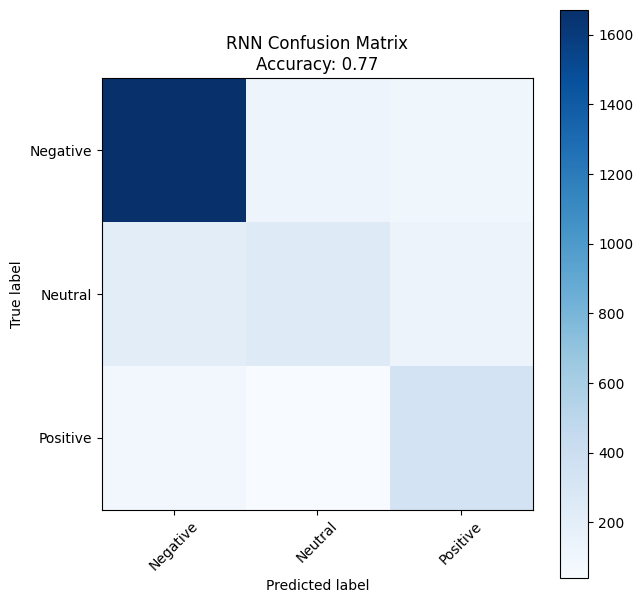

In [36]:
# RNN
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_confusion_matrix(y_test, rnn_preds, title='RNN Confusion Matrix\nAccuracy: {:.2f}'.format(rnn_accuracy))

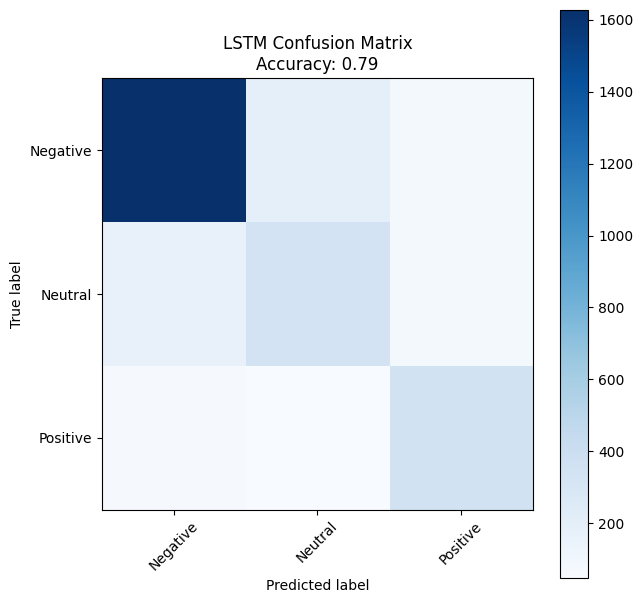

In [34]:
# LSTM
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plot_confusion_matrix(y_test, lstm_preds, title='LSTM Confusion Matrix\nAccuracy: {:.2f}'.format(lstm_accuracy))
plt.show()

Inference:
Based on model evaluation and accuracy score we can conclude that LSTM out performed RNN. Hence for the given dataset LSTM is better suited.